# HW 11

## Question 1
Given the following LP:

$\begin{aligned} \\
\text{max  } & x_{12} + x_{22} + x_{23} \\
\text{s.t. } & x_{11} + x_{23} \le 12 \\
& x_{11} + x_{12} + x_{13} = 20 \\
& x_{21} + x_{22} + x_{23} = 20 \\
& x_{11} + x_{21} = 10 \\
& x_{12} + x_{22} = 20 \\
& x_{13} + x_{23} = 10 \\
& x_{ij} \ge 0, \forall i \in \{1, 2\} j \in \{1, 2, 3\} \\
\end{aligned}$

Consider the first constraint $x_{11} + x_{23} \le 12$ as the "complicating" constraint (i.e. the $Dx \le b$ constraint) and consider the remaining constraints including nonnegativity constraints as the "easy" constraints, which define a polyhedron $P$. That is, $P$ is defined by the above five equality constraints and the nonnegativity constraints.

#### 1) Argue that the polyhedron P defined above is bounded.
$P$ is bounded since each varaiable $(x_{11}, x_{12}, x_{13}, x_{21}, x_{22}, x_{23})$ is bounded above by the given constraints equality constraints and bounded below by the given non-negativity costraints.


#### 2) Since P is bounded, we can use the extreme point representation for P. Specify $c, D$, and $b$ for this problem.


$c = [0 \  1 \  0 \  0 \  1 \ 1]^T$

$D = [1 \  0 \  0 \  0 \  0 \ 1]$

$b = [12 \  20 \  20 \  10 \  20 \  10]^T$


#### 3) Construct the restricted master problem using these two extreme points given the following two extreme points of the polyhedron P:

$x^1 = (x_{11}, x_{12}, x_{13}, x_{21}, x_{22}, x_{23}) = (10, 10, 0, 0, 10, 10)$

and

$x^2 = (x_{11}, x_{12}, x_{13}, x_{21}, x_{22}, x_{23}) = (0, 10, 10, 10, 10, 0)$

To get the RMP, we'll first calculate the individual parts:

$c^Tx^1 = 30$ $Dx^1 = 20$

$c^Tx^2 = 20$ $Dx^2 = 0$

The RMP becomes:

$\begin{aligned} \\
\text{min  } & 30\lambda_1 + 20\lambda_2 \\
\text{s.t.  } & 20\lambda_1 = 12 \\
& \lambda_1 + \lambda_2 = 1 \\
& \lambda_1, \lambda_2 \ge 0 \\
\end{aligned}$

#### 4) Find the optimal solution of the restricted master problem, which can be solved by hand.
In the prior section, we can see that $\lambda_1 = \frac{3}{5}$ which implies $\lambda_2 = \frac{2}{5}$.

#### 5a) Find the basis matrix for the optimal solution of the restricted master problem and compute the dual variables using:
$B = \begin{bmatrix}20 & 0 \\ 1 & 1\end{bmatrix}$

$c_B = [30 \ 20]^T$

$[\hat{y}^T \hat{r}] = c_B^TB^{-1} = [20 \ 20]\begin{bmatrix}\frac{1}{20} & 0 \\ \frac{-1}{20} & 1\end{bmatrix} = [\frac{1}{2} \  20]$

#### 5b) Form the dual problem of the restricted master problem, and compute the optimal dual variables using Complementary Slackness
The dual is of the form:

$\begin{aligned}
\text{max  } & 12\lambda_1 + \lambda_2 \\
\text{s.t. } & 20\lambda_1 + \lambda_2 \le 30 \\
& \lambda_2 \le 20 \\
& \lambda_1, \lambda_2 \ge 0 \\
\end{aligned}$

From here we can see $\lambda_2 = 20$ which gives a $\lambda_1 = \frac{1}{2}$ which agrees with the above.

#### 6) Using the dual variables computed in the previous part, formulate the subproblem that maximizes the reduced cost of the restricted master problem. 

$\hat{Z} = \text{min } (c^T - \hat{y}^TD)x - \hat{r} \\
c^T - \hat{y}^TD = [0 \  1 \  0 \  0 \  1 \ 1] - \frac{1}{2}[1 \  0 \  0 \  0 \  0 \ 1] = [\frac{-1}{2} \  1 \  0  \  0 \  1 \  \frac{1}{2}]$

$\begin{aligned} 
\text{min  } & \frac{-1}{2}x_{11} + x_{12} + x_{22} + \frac{1}{2}x_{23} - 20 \\
\text{s.t. } & x_{11} + x_{12} = 20 \\
& x_{22} + x_{23} = 20 \\
& x_{11} = 10 \\
& x_{12} + x_{22} = 20 \\
& x_{23} = 10 \\
& x_{ij} \ge 0
\end{aligned}$

$\hat{Z} = -5 + 10 + 10 + 5 - 20 = 0$

This cost is non-negative therefore we should terminate.

#### 7) The polytope P has an interesting interpretation. Think about $x_{ij}$ as the amount of product shipped from warehouse $i$ to city $j$. Use this to interpret the five equality constraints as flow conservation constraints.

# Question 2
Use SVD to compress the clown image.

*Note that python is being used instead of matlab as stated in the HW assignment. This is becuase all other assignments are in python.*

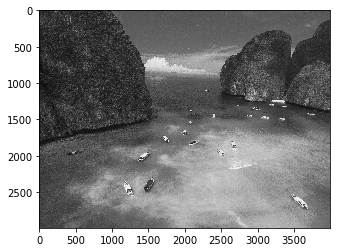

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#open image and convert to np matrix
img = Image.open('image.jpg').convert('L')
plt.figure(figsize=(6, 4))
plt.imshow(img);

imgmat = np.array(img.getdata())
imgmat.shape = (img.size[1], img.size[0])
imgmat = np.matrix(imgmat)

In [13]:
U, sigma, V = np.linalg.svd(imgmat)

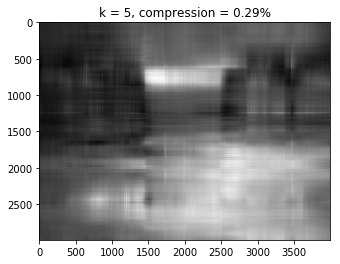

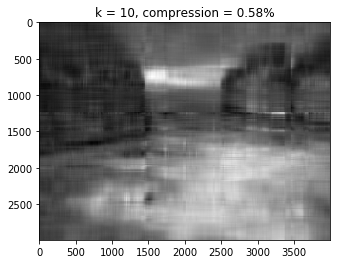

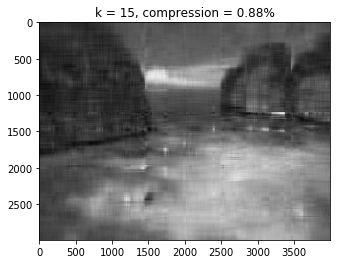

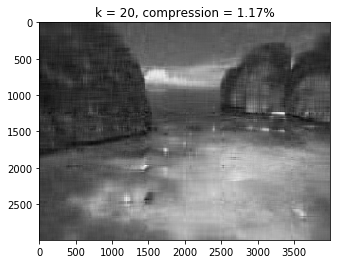

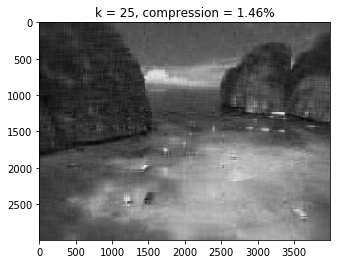

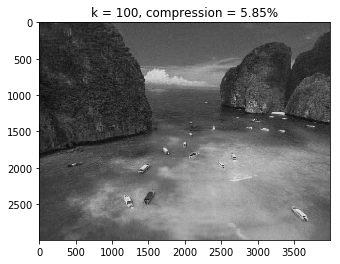

In [14]:
cmp = (img.size[0] + img.size[1]) / (img.size[0]*img.size[1])

for k in [5, 10, 15, 20, 25, 100]:
    newimg = U[:, :k] * np.diag(sigma[:k]) * V[:k, :]
    plt.figure(figsize=(6, 4))
    plt.imshow(newimg, cmap='gray')
    title = "k = {}, compression = {}%".format(k, round(100.*cmp*k,2))
    plt.title(title)
    plt.show()